<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [55]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 135.3 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [61]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [62]:
## Write your code here

duplicate_rows = df[df.duplicated(keep=False)]
num_duplicates = len(duplicate_rows)
print(num_duplicates)
duplicate_rows.head()

40


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [46]:
## Write your code here
df.drop_duplicates(inplace=True)
duplicate_rows = df[df.duplicated(keep=False)]
num_duplicates = len(duplicate_rows)
print(num_duplicates)

0


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [63]:
## Write your code here

# identify missing values per column
missing_data = df.isnull()
missing_per_column = missing_data.sum()
print(missing_per_column)

# replace the missing 'RemoteWork' values by the most frequent
df["RemoteWork"].replace(np.nan, df['RemoteWork'].value_counts().idxmax(), inplace=True)
print(df["RemoteWork"].isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10637
                       ...  
JobSatPoints_11        36006
SurveyLength            9259
SurveyEase              9202
ConvertedCompYearly    42020
JobSat                 36326
Length: 114, dtype: int64
0


/tmp/ipykernel_301/1399650598.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RemoteWork"].replace(np.nan, df['RemoteWork'].value_counts().idxmax(), inplace=True)


In [31]:
### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [66]:
## Write your code here

# Drop missing values
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])


# Normalize compensation data
min_value = df_cleaned['ConvertedCompYearly'].min()
max_value = df_cleaned['ConvertedCompYearly'].max()

# Apply Min-Max normalization to 'ConvertedCompYearly'
df_cleaned['ConvertedCompYearly_MinMax'] = (df_cleaned['ConvertedCompYearly'] - min_value) / (max_value - min_value)

# Apply Z-score normalization to 'ConvertedCompYearly'
df_cleaned['ConvertedCompYearly_ZScore'] = (df_cleaned['ConvertedCompYearly'] - df_cleaned['ConvertedCompYearly'].mean()) / df_cleaned['ConvertedCompYearly'].std()

/tmp/ipykernel_301/3759537789.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ConvertedCompYearly_MinMax'] = (df_cleaned['ConvertedCompYearly'] - min_value) / (max_value - min_value)
/tmp/ipykernel_301/3759537789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ConvertedCompYearly_ZScore'] = (df_cleaned['ConvertedCompYearly'] - df_cleaned['ConvertedCompYearly'].mean()) / df_cleaned['ConvertedCompYearly'].std()


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


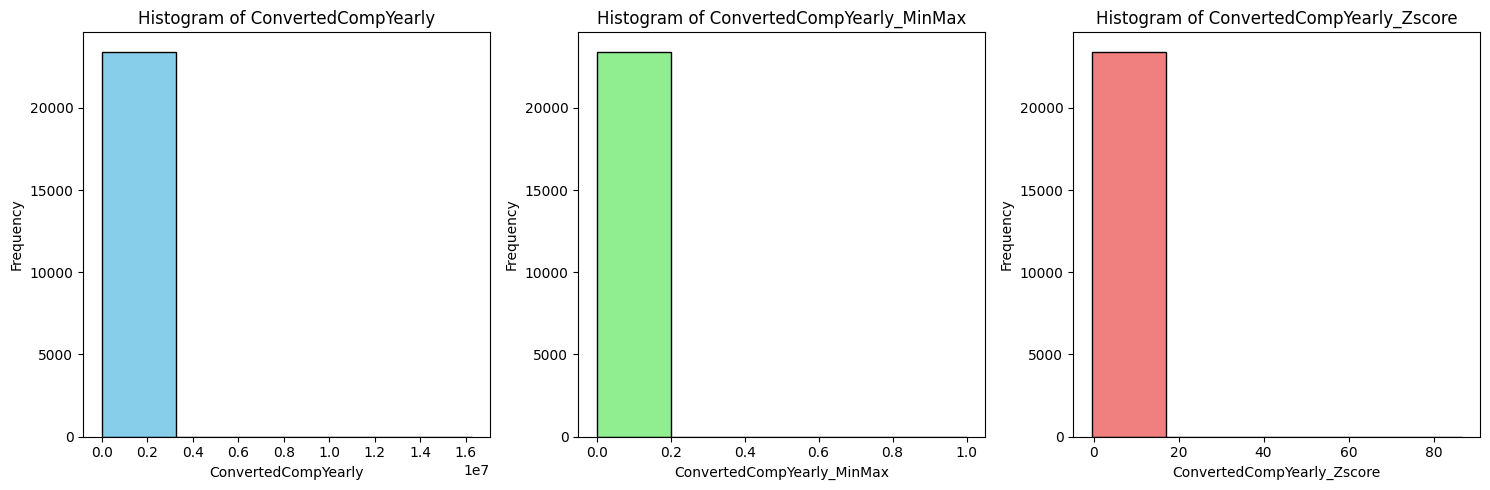

In [67]:
## Write your code here
# Create a figure for the histograms
plt.figure(figsize=(15, 5))

# Plot histogram for the original 'ConvertedCompYearly'
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Plot histogram for 'ConvertedCompYearly_MinMax'
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly_MinMax')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')

# Plot histogram for 'ConvertedCompYearly_Zscore'
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_ZScore'], bins=5, color='lightcoral', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly_Zscore')
plt.xlabel('ConvertedCompYearly_Zscore')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()



<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
